In [1]:
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import model_selection
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from rulefit import RuleFit
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import numpy as np

#Load Data
a=["date", "Day","Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
b=["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
c=["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
d=["Appliances"]
df = pd.read_csv("energydata_complete.csv",usecols=a)
df2=  pd.read_csv("energydata_complete.csv",usecols=b)
df1 = df[['date','Day']]
data = df[['Appliances','lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9','T_out','Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',"Tdewpoint",'rv1', 'rv2' ]]
scaler = MinMaxScaler()
scaler.fit(data)
#print()
#print(scaler.data_max_)
data_trans = scaler.transform(data)
df2.loc[:,:]=data_trans
df2.head()
df = pd.concat([df1, df2], axis=1)
df.head()
del a[0]
del a[0]
df.head()

y=df['Appliances']
X=df[["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]]

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X, y)
rmse_cv(model_lasso).mean()

0.0922425854007723

In [3]:
coef = pd.Series(model_lasso.coef_, index = X.columns)
coef.head()
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 20 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

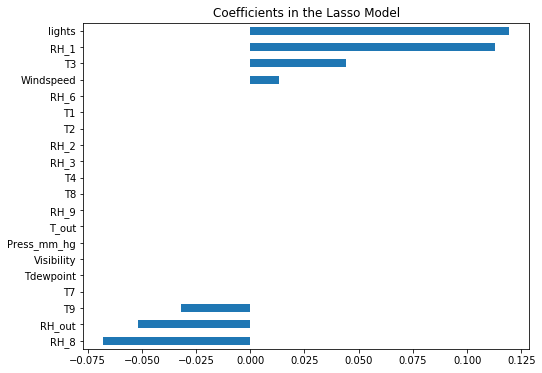

In [4]:

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [5]:
y=df['Appliances']
X=df[["lights", "RH_1", "T3", "Windspeed", "T9", "RH_out", "RH_8"]]

R-Squared Value: 0.13
MAE: 0.0513887000990267
MSE: 0.008277566526935457
RMSE: 0.09098113280749727


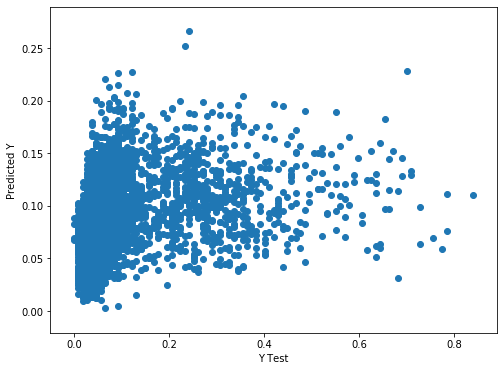

R-Squared Value: 0.11
MAE: 0.05021373720065492
MSE: 0.007983895969006009
RMSE: 0.08935264947949785


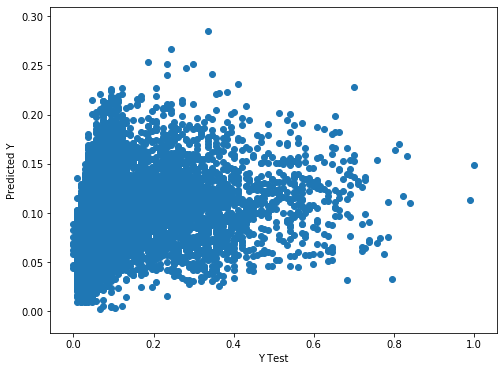

R-Squared Value: 0.13
MAE: 0.05021373720065492
MSE: 0.007983895969006009
RMSE: 0.08935264947949785


Text(0, 0.5, 'Predicted Y')

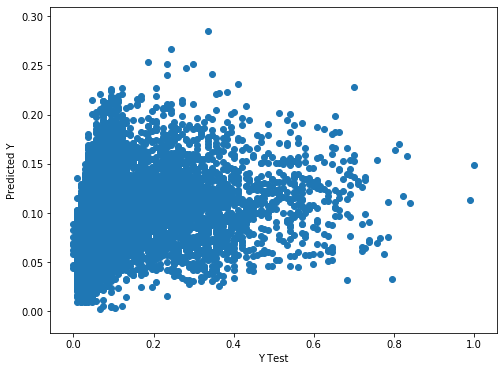

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R-Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()



#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R-Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LinearRegression()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R-Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R Squared Value: 1.00
MAE: 0.08390474324737579
MSE: 0.010457252471878349
RMSE: 0.10226070834821334


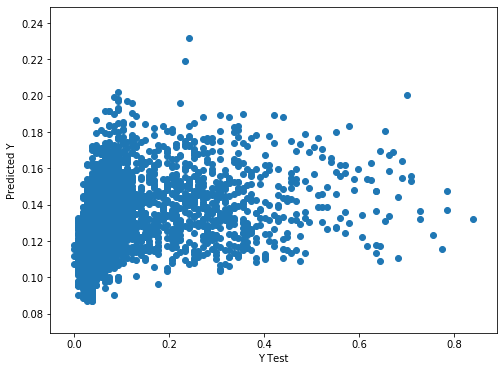

R Squared Value: -0.17
MAE: 0.08320447347476947
MSE: 0.010238088258299641
RMSE: 0.10118343865623287


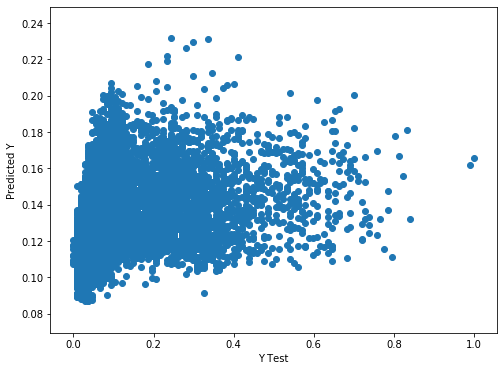

R Squared Value: -0.12
MAE: 0.08320447347476947
MSE: 0.010238088258299641
RMSE: 0.10118343865623287


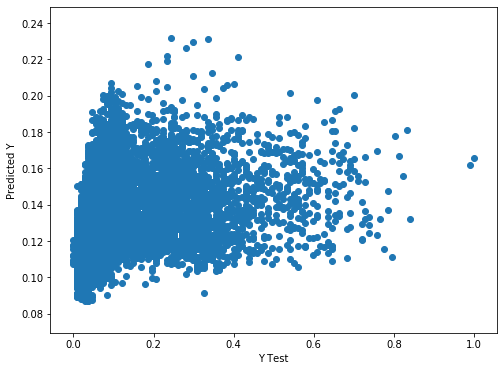

In [7]:
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, predictions)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = SVR(kernel='rbf')
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = SVR(kernel='rbf')
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.05
MAE: 0.040959865645327026
MSE: 0.009004156084341582
RMSE: 0.09489023176461095


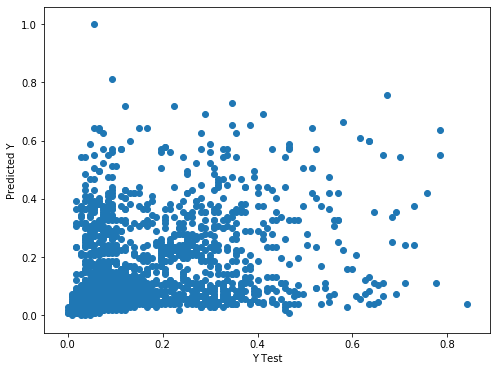

R Squared Value: -2.23
MAE: 0.012295153778215563
MSE: 0.0027015214231594217
RMSE: 0.05197616206646487


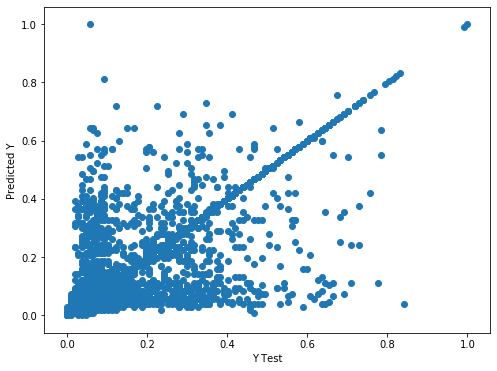

R Squared Value: -0.02
MAE: 0.012295153778215563
MSE: 0.0027015214231594217
RMSE: 0.05197616206646487


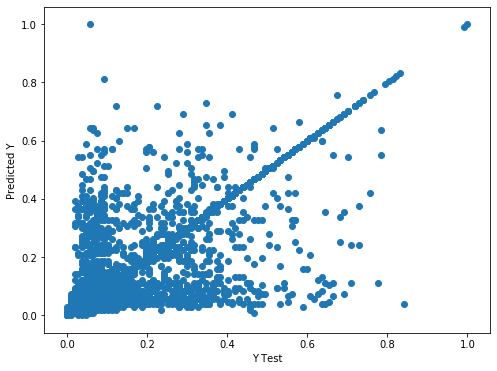

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = DecisionTreeRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = DecisionTreeRegressor()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

RMSE value for k=  1 is: 0.08362246779468555
RMSE value for k=  2 is: 0.07748254757546486
RMSE value for k=  3 is: 0.0782435408290198
RMSE value for k=  4 is: 0.07823414893263993
RMSE value for k=  5 is: 0.07878648911171196
RMSE value for k=  6 is: 0.07963778394230643
RMSE value for k=  7 is: 0.07977375894037163
RMSE value for k=  8 is: 0.08016364376680304
RMSE value for k=  9 is: 0.0805712808806064
RMSE value for k=  10 is: 0.08090944870405797
RMSE value for k=  11 is: 0.08112999020241504
RMSE value for k=  12 is: 0.08124584235113394
RMSE value for k=  13 is: 0.08150157392282363
RMSE value for k=  14 is: 0.08183714020172604
RMSE value for k=  15 is: 0.08200177119553156
RMSE value for k=  16 is: 0.08227156137641929
RMSE value for k=  17 is: 0.08250328891472017
RMSE value for k=  18 is: 0.08276353808950315
RMSE value for k=  19 is: 0.08298301093222714
RMSE value for k=  20 is: 0.08317223213101949


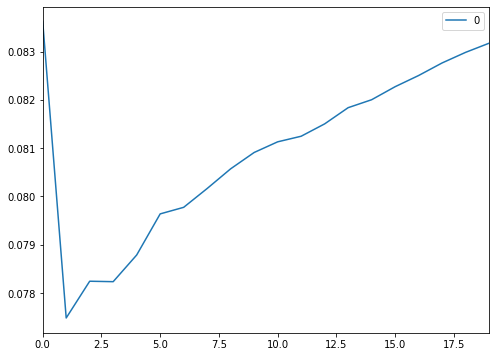

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

R Squared Value: 0.36
MAE: 0.036048364735897
MSE: 0.006122051681462488
RMSE: 0.0782435408290198


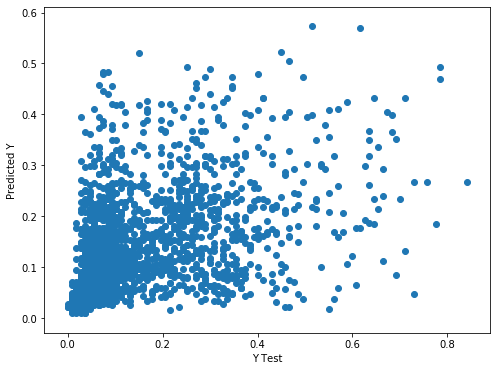

R Squared Value: -0.39
MAE: 0.026169644992411135
MSE: 0.0036232524147170493
RMSE: 0.06019345823855819


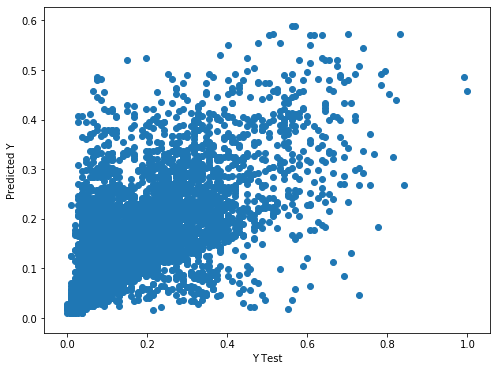

R Squared Value: 0.36
MAE: 0.026169644992411135
MSE: 0.0036232524147170493
RMSE: 0.06019345823855819


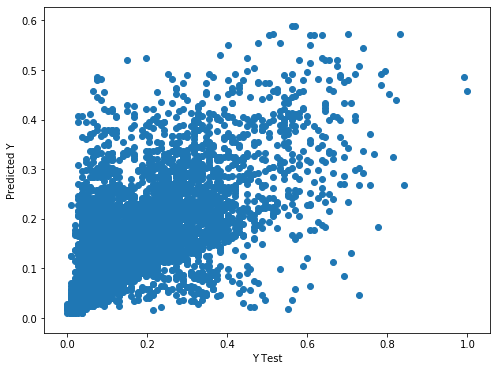

In [10]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = neighbors.KNeighborsRegressor(n_neighbors = 3)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = neighbors.KNeighborsRegressor(n_neighbors = 3)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.21
MAE: 0.04717181976063592
MSE: 0.007513746273443572
RMSE: 0.08668186819308621


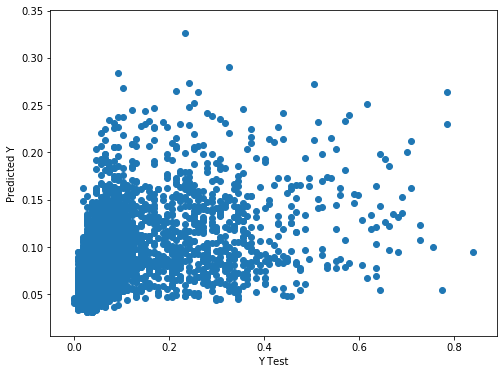

R Squared Value: 0.04
MAE: 0.04470968384423763
MSE: 0.006686472637069073
RMSE: 0.08177085444746846


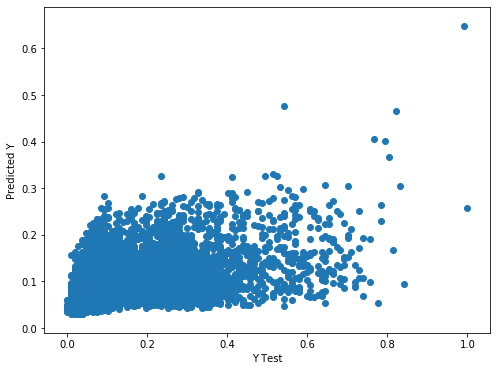

R Squared Value: 0.22
MAE: 0.04470968384423763
MSE: 0.006686472637069073
RMSE: 0.08177085444746846


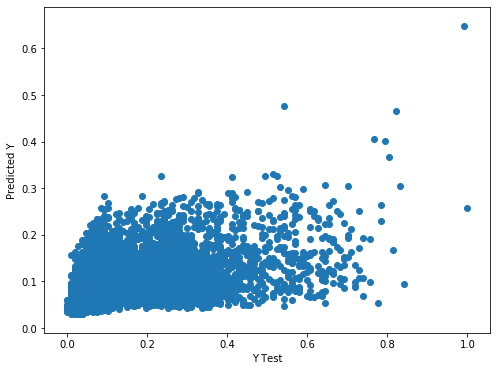

In [11]:
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.GradientBoostingRegressor(**params)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.GradientBoostingRegressor(**params)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.43
MAE: 0.03567935627657046
MSE: 0.005397753994883516
RMSE: 0.07346940856494978


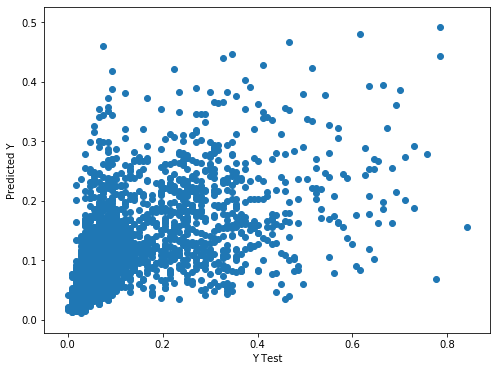

R Squared Value: -0.25
MAE: 0.019578039560822356
MSE: 0.0020984934481813344
RMSE: 0.04580931617238282


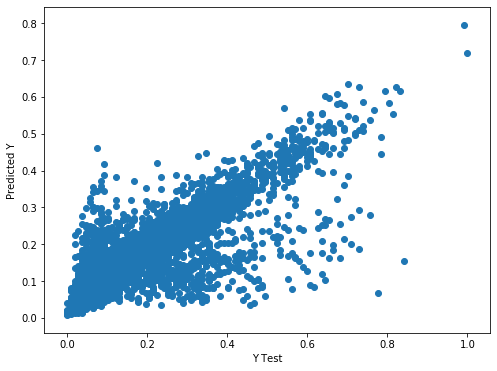

R Squared Value: 0.44
MAE: 0.019578039560822356
MSE: 0.0020984934481813344
RMSE: 0.04580931617238282


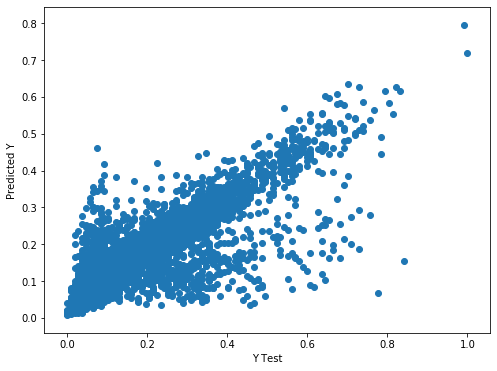

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.43
MAE: 0.03589539631128456
MSE: 0.0054629101526187124
RMSE: 0.07391150216724533


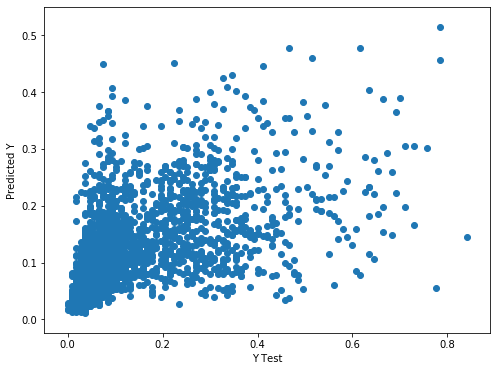

R Squared Value: -0.27
MAE: 0.01979526897840535
MSE: 0.0021449153344678335
RMSE: 0.04631323066325468


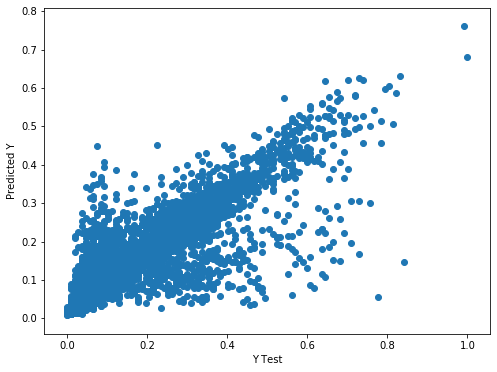

R Squared Value: 0.44
MAE: 0.01979526897840535
MSE: 0.0021449153344678335
RMSE: 0.04631323066325468


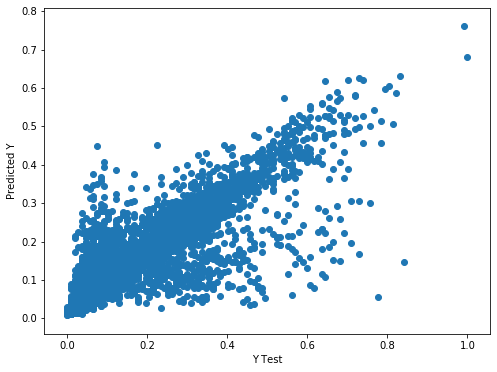

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [14]:
y=df['Appliances'].values
X=df[["lights","RH_1","T3","RH_3","RH_5","T6","RH_6","T7","T8","Press_mm_hg","Windspeed","Visibility","Tdewpoint"]].values

#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rf = RuleFit()
rf.fit(X_train, y_train)
predictions=rf.predict(X_test)
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
print(rules)

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


                                                   rule    type      coef  \
3                                             feature_3  linear -0.081138   
9                                             feature_9  linear -0.015739   
10                                           feature_10  linear -0.008299   
6                                             feature_6  linear  0.064563   
8                                             feature_8  linear  0.013156   
7                                             feature_7  linear -0.018268   
817                     feature_8 <= 0.9362221360206604    rule -0.011655   
1699                    feature_9 > 0.04011628031730652    rule -0.011039   
1460  feature_9 <= 0.9872093200683594 & feature_10 >...    rule -0.011626   
727                      feature_1 <= 0.606503963470459    rule  0.001329   
1565  feature_3 <= 0.822230875492096 & feature_9 <= ...    rule -0.036588   
897   feature_1 <= 0.6645812392234802 & feature_9 > ...    rule -0.021953   

R Squared Value: 0.43
MAE: 0.04645261276219307
MSE: 0.0071358393831530064
RMSE: 0.08447389764390541


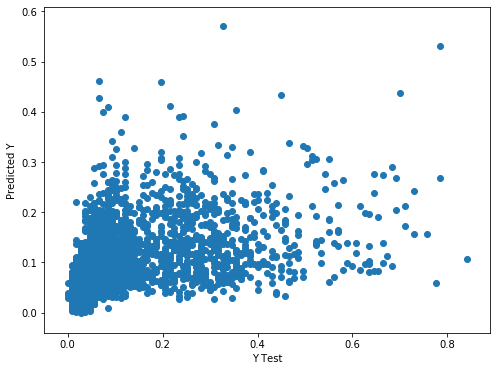

In [15]:
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()